# Analisis discriminante lineal

Al final es un algoritmo de clasificacion genartivo!. Se basa en  la proyeccion de datos en una distribucion normal multivariada (distribucion normal pero para muchas variables).

En la distribucion normal simple se necesita la media ($\mu$) y la varianza ($\sigma$) de un conjunto de datos.
En la distribucion multivariada, se da un conjunto de medias (1 para cada variable que se quiera analizar) y una matriz de varianzas (donde la diagonal es la varianza de cada variable,
y el contenido de los triangulos son las covarianzas). Esta distribucion multivariada genera elipses en el espacio.

La media de la distribucion normal multivariada da cuenta del centro del plano.
La matriz de varianzas cambia la forma del plano de distribucion (mas angosto o mas ancho) y tambien su direccion (si es postitivo o negativo, etc)

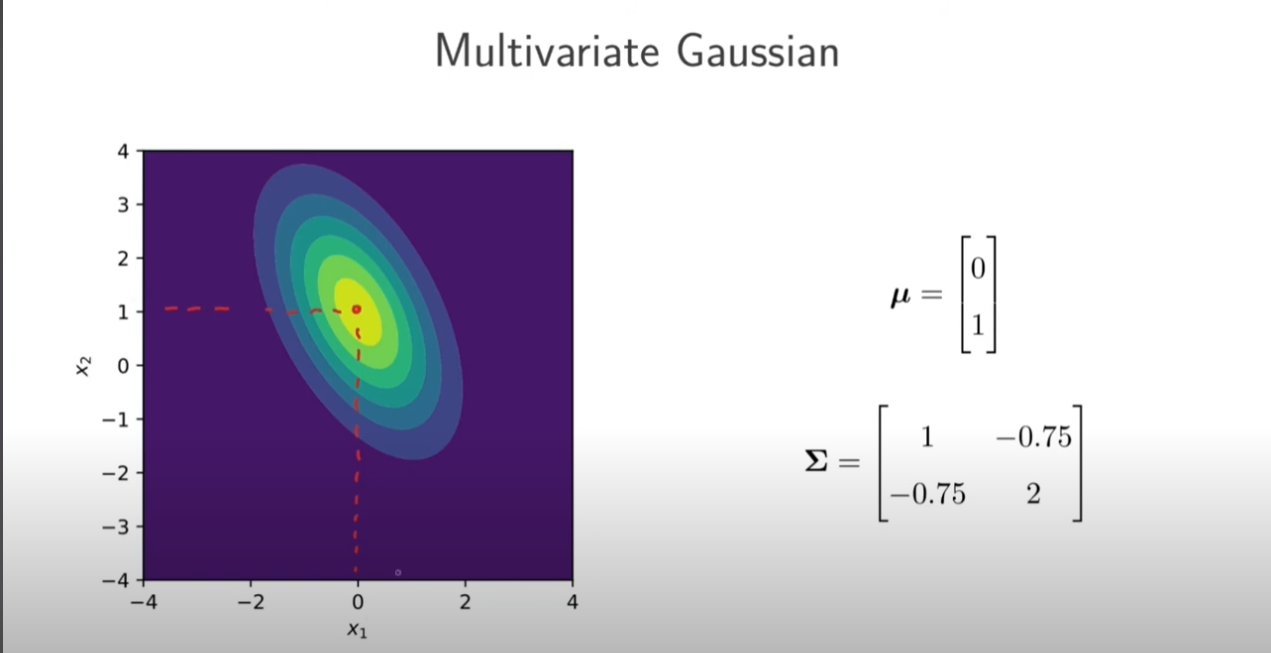

En el caso anterior, el conjunto de medias indica que el centro debiese estar en el punto (0, 1) (que asi se muestra). Ademas, se muestra que la covarianza es de -0.75, por lo que el corte
del plano da cuenta que va hacia abajo.

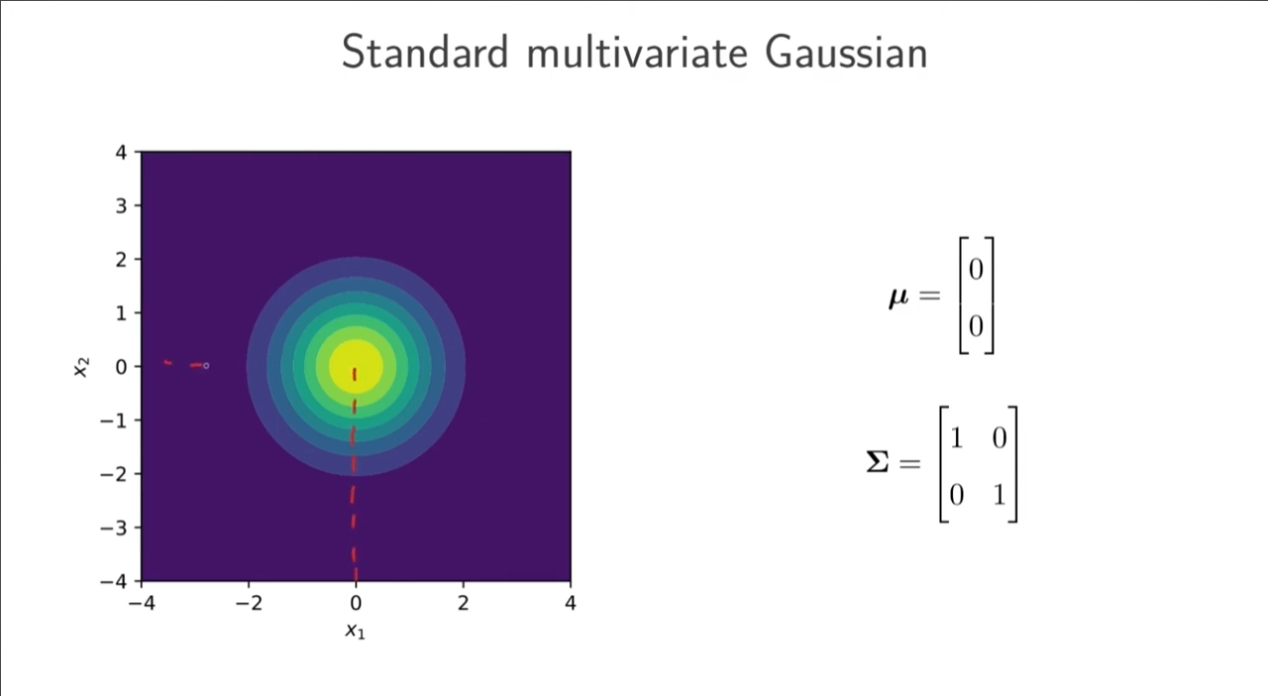

En el caso anterior, esta es la distribucion normal multivariada estandar. Esto, porque se tiene una media de (0, 0), y una covarianza de (0, 0).

En caso de que las covarianas sean iguales, entonces la forma del plano va a ser regular. Sin embargo, las covarianzas pueden ser distintas, y eso indicaria que el plano va a ser irreglar en uno de los ejes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('iris.csv')